In [60]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
from urllib.parse import urljoin
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [65]:
def translit(text):
    translit_dict = {
        'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ё': 'yo',
        'ж': 'zh', 'з': 'z', 'и': 'i', 'й': 'y', 'к': 'k', 'л': 'l', 'м': 'm',
        'н': 'n', 'о': 'o', 'п': 'p', 'р': 'r', 'с': 's', 'т': 't', 'у': 'u',
        'ф': 'f', 'х': 'kh', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh', 'щ': 'shch',
        'ъ': '', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'yu', 'я': 'ya',
        'А': 'A', 'Б': 'B', 'В': 'V', 'Г': 'G', 'Д': 'D', 'Е': 'E', 'Ё': 'Yo',
        'Ж': 'Zh', 'З': 'Z', 'И': 'I', 'Й': 'Y', 'К': 'K', 'Л': 'L', 'М': 'M',
        'Н': 'N', 'О': 'O', 'П': 'P', 'Р': 'R', 'С': 'S', 'Т': 'T', 'У': 'U',
        'Ф': 'F', 'Х': 'Kh', 'Ц': 'Ts', 'Ч': 'Ch', 'Ш': 'Sh', 'Щ': 'Shch',
        'Ъ': '', 'Ы': 'Y', 'Ь': '', 'Э': 'E', 'Ю': 'Yu', 'Я': 'Ya'
    }
    return ''.join([translit_dict.get(char, char) for char in text])

def get_pages_count(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    last_page = soup.find('li', class_='pager-last item last')
    if last_page:
        return int(last_page.find('a')['href'].split('=')[-1]) + 1
    return 1

def get_last_page_tasks(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return len(soup.find_all('div', class_='node node-task node-teaser clearfix'))

def update_link(topics, urls, topic_name, new_url):
    if topic_name in topics:
        urls[topics.index(topic_name)] = new_url
    else:
        topics.append(topic_name)
        urls.append(new_url)

def calculate_percentage(task_count, total_tasks):
    return {topic: (count / total_tasks) * 100 for topic, count in task_count.items()}

def plot_percentage(percentages, title, colors, k):
    if (k):
      filtered_percentages = {k: v for k, v in percentages.items() if v >= 3}
    else:
      filtered_percentages = percentages
    sorted_percentages = dict(sorted(filtered_percentages.items(), key=lambda item: item[1]))

    topics = list(sorted_percentages.keys())
    values = list(sorted_percentages.values())

    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('#FFF8E7')
    plt.gcf().set_facecolor('#FFF8E7')

    bars = plt.barh(topics, values, color=colors[:len(topics)])
    plt.xlabel('Процент задач от всех существующих')
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', ha='left')

    plt.xlim(right=max(values) * 1.1)

    plt.show()

будем очень странно парсить - найдем откуда спарсить темы списком, обработаем их, а дальше поймем, что все ссылки на эти темы устроены одинаковым образом - https://iloveeconomics.ru/zadachi-temy/ + название темы транслитом. Переведем название, получим новые ссылки, оставшееся вручную раскидаем.

При парсинге посчитаем количество страниц, на каждой странице кроме последней по 10 задач, так что по сути считам страницы, умножаем на 10 и прибавляем задачи на последней странице.

In [38]:
base_url = 'https://iloveeconomics.ru'
page_url = 'https://iloveeconomics.ru/zadachi'
response = requests.get(page_url)
soup = BeautifulSoup(response.text, 'html.parser')

topics = []
select = soup.find('select', {'id': 'edit-subject'})
names = [opt.text.strip() for opt in select.find_all('option')]
cleaned_names = [name.lstrip('-') for name in names]
translit_names = [translit(name) for name in cleaned_names]
dash_names = [name.replace(' ', '-') for name in translit_names]
theme_url = "https://iloveeconomics.ru/zadachi-temy/"
urls = [theme_url + name for name in dash_names]

update_link(cleaned_names, urls, "математика", "https://iloveeconomics.ru/z/topic/matematika")
update_link(cleaned_names, urls, "совершенная конкуренция", "https://iloveeconomics.ru/zadachi-temy/sovershennaya-konkurenciya")
update_link(cleaned_names, urls, "монополистическая конкуренция", "https://iloveeconomics.ru/zadachi-temy/monopolisticheskaya-konkurenciya")
update_link(cleaned_names, urls, "производственный процесс", "https://iloveeconomics.ru/zadachi-temy/proizvodstvennyy-process")
update_link(cleaned_names, urls, "асимметрия информации", "https://iloveeconomics.ru/zadachi-temy/asimmetriya-informacii")
update_link(cleaned_names, urls, "неравенство доходов", "https://iloveeconomics.ru/zadachi-temy/neravenstvo-dohodov")
update_link(cleaned_names, urls, "рост и цикл", "https://iloveeconomics.ru/zadachi-temy/rost-i-cikl")
update_link(cleaned_names, urls, "безработица", "https://iloveeconomics.ru/zadachi-temy/bezrabotica")
update_link(cleaned_names, urls, "инфляция", "https://iloveeconomics.ru/zadachi-temy/inflyaciya")
update_link(cleaned_names, urls, "обратная индукция", "https://iloveeconomics.ru/zadachi-temy/obratnaya-indukciya")
update_link(cleaned_names, urls, "ограничения цены", "https://iloveeconomics.ru/zadachi-temy/ogranicheniya-ceny")
update_link(cleaned_names, urls, "деньги, банки и монетарная политика", "https://iloveeconomics.ru/zadachi-temy/dengi-banki-i-monetarnaya-politika")
update_link(cleaned_names, urls, "налоги, бюджет и фискальная политика", "https://iloveeconomics.ru/zadachi-temy/nalogi-byudzhet-i-fiskalnaya-politika")
update_link(cleaned_names, urls, "AD-AS", "https://iloveeconomics.ru/zadachi-temy/ad")
update_link(cleaned_names, urls, "инвестиции и дисконтирование", "https://iloveeconomics.ru/zadachi-temy/investicii-i-diskontirovanie")

task_count = {}
for url, topic in zip(urls, cleaned_names):
    try:
        pages = get_pages_count(url)
        if pages > 1:
            tasks = (pages - 1) * 10
            last_page_url = f"{url}?page={pages - 1}"
            tasks += get_last_page_tasks(last_page_url)
        else:
            tasks = get_last_page_tasks(url)
        task_count[topic] = tasks
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
        task_count[topic] = 0

print("Статистика по задачам:")
for topic, count in task_count.items():
    print(f"Тема: {topic}")
    print(f"Количество задач: {count}")
    print()

Статистика по задачам:
Тема: математика
Количество задач: 216

Тема: микроэкономика
Количество задач: 1516

Тема: компромиссный выбор
Количество задач: 121

Тема: КПВ
Количество задач: 183

Тема: международная торговля
Количество задач: 86

Тема: потребитель и спрос
Количество задач: 263

Тема: производитель и рынки
Количество задач: 536

Тема: олигополия
Количество задач: 45

Тема: рынок труда
Количество задач: 83

Тема: совершенная конкуренция
Количество задач: 138

Тема: монополия
Количество задач: 212

Тема: монополистическая конкуренция
Количество задач: 13

Тема: производственный процесс
Количество задач: 113

Тема: издержки
Количество задач: 166

Тема: эластичность
Количество задач: 142

Тема: асимметрия информации
Количество задач: 18

Тема: моральный риск
Количество задач: 5

Тема: неравенство доходов
Количество задач: 71

Тема: теория игр
Количество задач: 60

Тема: обратная индукция
Количество задач: 21

Тема: вмешательство государства
Количество задач: 203

Тема: налоги и с

Построим графики, отражающие какой процент от всех задач составляют задачи по
каждой теме. Для этого тем же способом посчитаем все задачки с главной страницы, и относительно этого количества отнормируем все остальные темы. Пренебрежем очень уж малыми значениями. Отдельно рассмотрим, насколько представлены темы, которые часто встречаются на заключительном этапе.

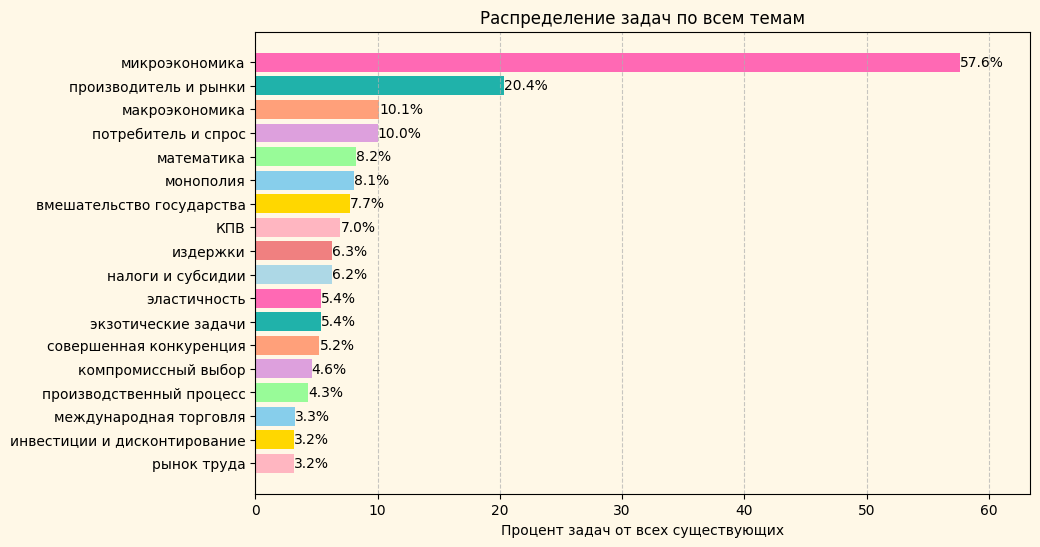

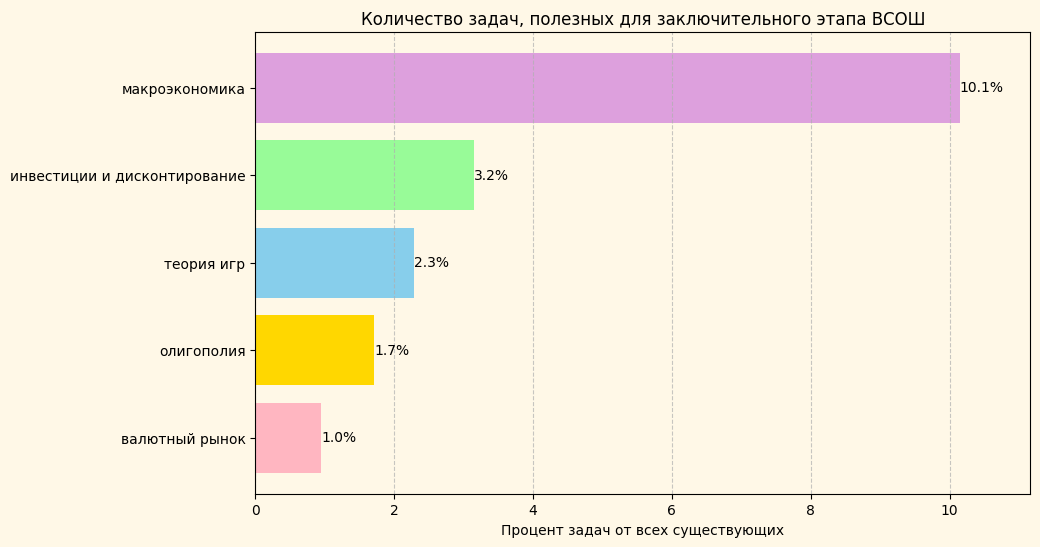

In [66]:

initial_url = 'https://iloveeconomics.ru/zadachi'
initial_pages = get_pages_count(initial_url)
if initial_pages > 1:
    total_tasks = (initial_pages - 1) * 10
    last_page_url = f"{initial_url}?page={initial_pages - 1}"
    total_tasks += get_last_page_tasks(last_page_url)
else:
    total_tasks = get_last_page_tasks(initial_url)


percentages = calculate_percentage(task_count, total_tasks)

# палиииитра
pastel_colors = ['#FFB6C1', '#FFD700', '#87CEEB', '#98FB98', '#DDA0DD',
                 '#FFA07A', '#20B2AA', '#FF69B4', '#ADD8E6', '#F08080']


plot_percentage(percentages, 'Распределение задач по всем темам', pastel_colors, 1)
selected_topics = ["олигополия", "теория игр", "инвестиции и дисконтирование",
                   "макроэкономика", "валютный рынок"]
selected_percentages = {topic: percentages.get(topic, 0) for topic in selected_topics}
plot_percentage(selected_percentages, 'Количество задач, полезных для заключительного этапа ВСОШ',
                pastel_colors, 0)